In [157]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['tables_1968_2018.csv']


In [158]:
data_path = '../input/tables_1968_2018.csv' # Path to data file
data = pd.read_csv(data_path) 
data.head(15)

,season,name,pos,team,p,w,d,l,f,a,gd,points
0,2017/2018,Premier League 2017-2018,1,Manchester City,38,32,4,2,106,27,79,100
1,2017/2018,Premier League 2017-2018,2,Manchester United,38,25,6,7,68,28,40,81
2,2017/2018,Premier League 2017-2018,3,Tottenham Hotspur,38,23,8,7,74,36,38,77
3,2017/2018,Premier League 2017-2018,4,Liverpool,38,21,12,5,84,38,46,75
4,2017/2018,Premier League 2017-2018,5,Chelsea,38,21,7,10,62,38,24,70
5,2017/2018,Premier League 2017-2018,6,Arsenal,38,19,6,13,74,51,23,63
6,2017/2018,Premier League 2017-2018,7,Burnley,38,14,12,12,36,39,-3,54
7,2017/2018,Premier League 2017-2018,8,Everton,38,13,10,15,44,58,-14,49
8,2017/2018,Premier League 2017-2018,9,Leicester City,38,12,11,15,56,60,-4,47
9,2017/2018,Premier League 2017-2018,10,Newcastle United,38,12,8,18,39,47,-8,44


In [159]:
data.columns

Index(['season', 'name', 'pos', 'team', 'p', 'w', 'd', 'l', 'f', 'a', 'gd',
       'points'],
      dtype='object')

In [160]:
def create_label_encoder_dict(df):
    from sklearn.preprocessing import LabelEncoder
    
    label_encoder_dict = {}
    for column in df.columns:
        # Only create encoder for categorical data types
        if not np.issubdtype(df[column].dtype, np.number) and column != 'season' and column != 'name'  and column != 'team':
            label_encoder_dict[column]= LabelEncoder().fit(df[column])
    return label_encoder_dict

In [161]:
label_encoders = create_label_encoder_dict(data)
print("Encoded Values for each Label")
print("="*32)
for column in label_encoders:
    print("="*32)
    print('Encoder(%s) = %s' % (column, label_encoders[column].classes_ ))
    print(pd.DataFrame([range(0,len(label_encoders[column].classes_))], columns=label_encoders[column].classes_, index=['Encoded Values']  ).T)

Encoded Values for each Label


In [162]:
# Apply each encoder to the data set to obtain transformed values
data2 = data.copy() # create copy of initial data set
for column in data2.columns:
    if column in label_encoders:
        data2[column] = label_encoders[column].transform(data2[column])

print("Transformed data set")
print("="*32)
data2

Transformed data set


,season,name,pos,team,p,w,d,l,f,a,gd,points
0,2017/2018,Premier League 2017-2018,1,Manchester City,38,32,4,2,106,27,79,100
1,2017/2018,Premier League 2017-2018,2,Manchester United,38,25,6,7,68,28,40,81
2,2017/2018,Premier League 2017-2018,3,Tottenham Hotspur,38,23,8,7,74,36,38,77
3,2017/2018,Premier League 2017-2018,4,Liverpool,38,21,12,5,84,38,46,75
4,2017/2018,Premier League 2017-2018,5,Chelsea,38,21,7,10,62,38,24,70
5,2017/2018,Premier League 2017-2018,6,Arsenal,38,19,6,13,74,51,23,63
6,2017/2018,Premier League 2017-2018,7,Burnley,38,14,12,12,36,39,-3,54
7,2017/2018,Premier League 2017-2018,8,Everton,38,13,10,15,44,58,-14,49
8,2017/2018,Premier League 2017-2018,9,Leicester City,38,12,11,15,56,60,-4,47
9,2017/2018,Premier League 2017-2018,10,Newcastle United,38,12,8,18,39,47,-8,44


In [163]:
data.columns

Index(['season', 'name', 'pos', 'team', 'p', 'w', 'd', 'l', 'f', 'a', 'gd',
       'points'],
      dtype='object')

In [164]:
X_data = data2[['w','points']]
Y_data = data2['pos']

In [165]:
df = pd.DataFrame([[5.1, 3.5], [4.9, 3.0], [7.0, 3.2], [6.4, 3.2], [5.9, 3.0]], columns=['w', 'pos'])

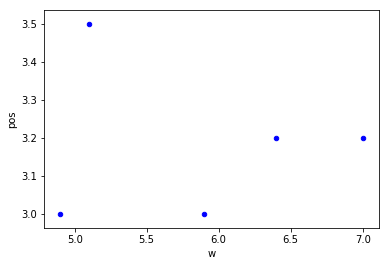

In [166]:
ax1 = df.plot.scatter(x='w', y='pos', c='Blue')

In [167]:
df2 = pd.DataFrame([[5.1, 3.5], [4.9, 3.0], [7.0, 3.2], [6.4, 3.2], [5.9, 3.0]], columns=['points', 'pos'])

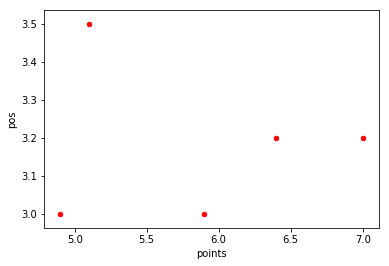

In [168]:
ax2 = df2.plot.scatter(x='points', y='pos', c='Red')

In [169]:
from sklearn.model_selection import train_test_split #train test split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.30)

In [170]:
from sklearn import linear_model

In [171]:
reg = linear_model.LinearRegression()

In [172]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [173]:
reg.coef_

array([-0.73857282, -0.11867939])

In [174]:
X_train.columns

Index(['w', 'points'], dtype='object')

In [175]:
print("Regression Coefficients")
pd.DataFrame(reg.coef_,index=X_train.columns,columns=["Coefficient"])

Regression Coefficients


,Coefficient
w,-0.738573
points,-0.118679


In [176]:
# Intercept
reg.intercept_

27.740411765114104

In [177]:
# Make predictions using the testing set
test_predicted = reg.predict(X_test)
test_predicted [0:5]

array([-0.57429835, 10.75434627, 19.39255487,  3.98851152, 17.17683641])

In [178]:
data3 = X_test.copy()
data3['predicted_position']=test_predicted
data3['pos']=y_test
data3.head(10)

,w,points,predicted_position,pos
261,25,83,-0.574298,2
639,14,56,10.754346,11
297,6,33,19.392555,18
938,23,57,3.988512,2
976,9,33,17.176836,18
60,26,87,-1.787589,1
204,19,65,5.993368,5
922,13,43,13.035751,8
417,9,40,16.346081,18
466,16,62,8.565124,7


In [179]:
data3 = X_test.copy()
data3['predicted_position']=test_predicted
data3['w']=y_test
data3.head(10)

,w,points,predicted_position
261,2,83,-0.574298
639,11,56,10.754346
297,18,33,19.392555
938,2,57,3.988512
976,18,33,17.176836
60,1,87,-1.787589
204,5,65,5.993368
922,8,43,13.035751
417,18,40,16.346081
466,7,62,8.565124


In [180]:
from sklearn.metrics import mean_squared_error, r2_score

In [181]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, test_predicted))

Mean squared error: 6.62


In [182]:
from sklearn.metrics import mean_absolute_error
y_true = [3, 4, 2, 7]
y_pred = [8, 0, 2, 4]
mae = mean_absolute_error(y_true, y_pred)

print('Mean Absolute Error: %f' % mae)

Mean Absolute Error: 3.000000


In [183]:
# Explained variance score: 1 is perfect prediction
# R squared
print('Variance score: %.2f' % r2_score(y_test, test_predicted))

Variance score: 0.82


In [184]:
# Returns the coefficient of determination R^2 of the prediction.
reg.score(X_test,y_test)

0.8207367477693545

In [185]:
from sklearn.decomposition import PCA

In [186]:
pca = PCA(n_components=1)

In [187]:
pca.fit(data2[X_train.columns])

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [188]:
pca.components_

array([[0.30386104, 0.95271636]])

In [189]:
pca.n_features_

2

In [190]:
pca.n_components_

1

In [191]:
X_test

,w,points
261,25,83
639,14,56
297,6,33
938,23,57
976,9,33
60,26,87
204,19,65
922,13,43
417,9,40
466,16,62


In [192]:
X_reduced = pca.transform(X_test)
X_reduced

array([[ 34.35252487],
       [  5.28671163],
       [-19.05665304],
       [  8.97417736],
       [-18.14506992],
       [ 38.46725136],
       [ 15.3804641 ],
       [ -7.40246213],
       [-11.47605538],
       [ 11.61073189],
       [ -0.73344759],
       [  3.3812789 ],
       [-18.79392524],
       [ 29.93393734],
       [ 30.58279266],
       [  3.3812789 ],
       [-15.97690939],
       [  1.43471294],
       [ 17.28589682],
       [-21.61094109],
       [  7.41373892],
       [-17.80007564],
       [-22.21866317],
       [  2.99515138],
       [  1.47584618],
       [-15.32805407],
       [  3.68513994],
       [-14.98305979],
       [ 23.30605604],
       [-13.07762706],
       [ -8.96290057],
       [-10.52333902],
       [ 20.75176799],
       [-17.88234212],
       [ -4.54431304],
       [ 19.49519059],
       [  6.84715007],
       [ 12.86730929],
       [  6.76488359],
       [  2.73242358],
       [-12.16604394],
       [ 40.98040617],
       [ 18.23861318],
       [-12

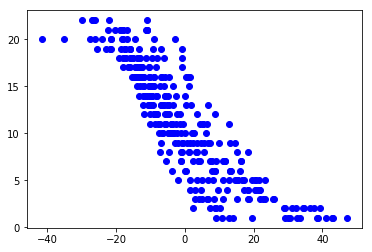

In [193]:
plt.scatter(X_reduced, y_test,  color='blue')

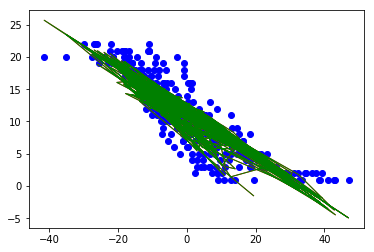

In [194]:
plt.scatter(X_reduced, y_test,  color='blue')
plt.plot(X_reduced, test_predicted, color='red',linewidth=1)
plt.plot(X_reduced, test_predicted, color='green',linewidth=1)

#plt.xticks(())
#plt.yticks(())

plt.show()

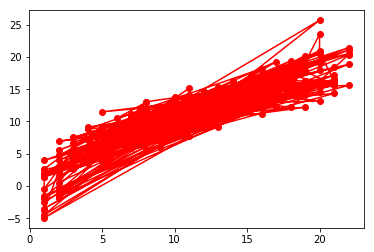

In [195]:
plt.plot(y_test, test_predicted, 'ro-')

In [196]:
np.std(np.abs(y_test-test_predicted))

1.534414263530734

In [197]:
data4=pd.DataFrame({'actual':y_test,'pred':test_predicted})
data4.head()

,actual,pred
261,2,-0.574298
639,11,10.754346
297,18,19.392555
938,2,3.988512
976,18,17.176836


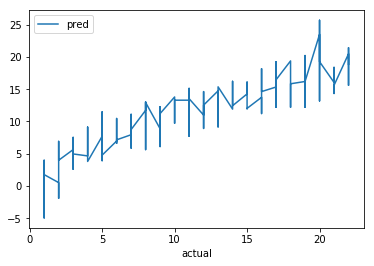

In [198]:
data4.sort_values('actual').plot(kind='line',x='actual',y='pred')

Text(0, 0.5, 'Residuals')

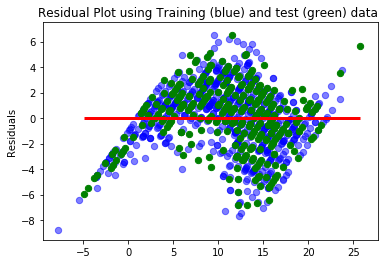

In [199]:
plt.scatter(reg.predict(X_train), reg.predict(X_train)-y_train,c='b',s=40,alpha=0.5)
plt.scatter(reg.predict(X_test),reg.predict(X_test)-y_test,c='g',s=40)
plt.hlines(y=0,xmin=np.min(reg.predict(X_test)),xmax=np.max(reg.predict(X_test)),color='red',linewidth=3)
plt.title('Residual Plot using Training (blue) and test (green) data ')
plt.ylabel('Residuals')

In [200]:
data.corr()

,pos,p,w,d,l,f,a,gd,points
pos,1.000000,8.136420e-02,-0.895618,0.109913,0.898185,-0.749478,0.776178,-9.007077e-01,-0.857841
p,0.081364,1.000000e+00,0.106702,0.291835,0.110881,0.174759,0.183441,1.369197e-17,-0.119334
w,-0.895618,1.067015e-01,1.000000,-0.292644,-0.825526,0.844658,-0.716922,9.241364e-01,0.885110
d,0.109913,2.918349e-01,-0.292644,1.000000,-0.167968,-0.164216,-0.005283,-9.629585e-02,-0.194447
l,0.898185,1.108814e-01,-0.825526,-0.167968,1.000000,-0.712709,0.820199,-9.038352e-01,-0.852586
f,-0.749478,1.747588e-01,0.844658,-0.164216,-0.712709,1.000000,-0.432999,8.544813e-01,0.752923
a,0.776178,1.834407e-01,-0.716922,-0.005283,0.820199,-0.432999,1.000000,-8.382476e-01,-0.731917
gd,-0.900708,1.369197e-17,0.924136,-0.096296,-0.903835,0.854481,-0.838248,1.000000e+00,0.877284
points,-0.857841,-1.193338e-01,0.885110,-0.194447,-0.852586,0.752923,-0.731917,8.772843e-01,1.000000


In [201]:
import seaborn as sns

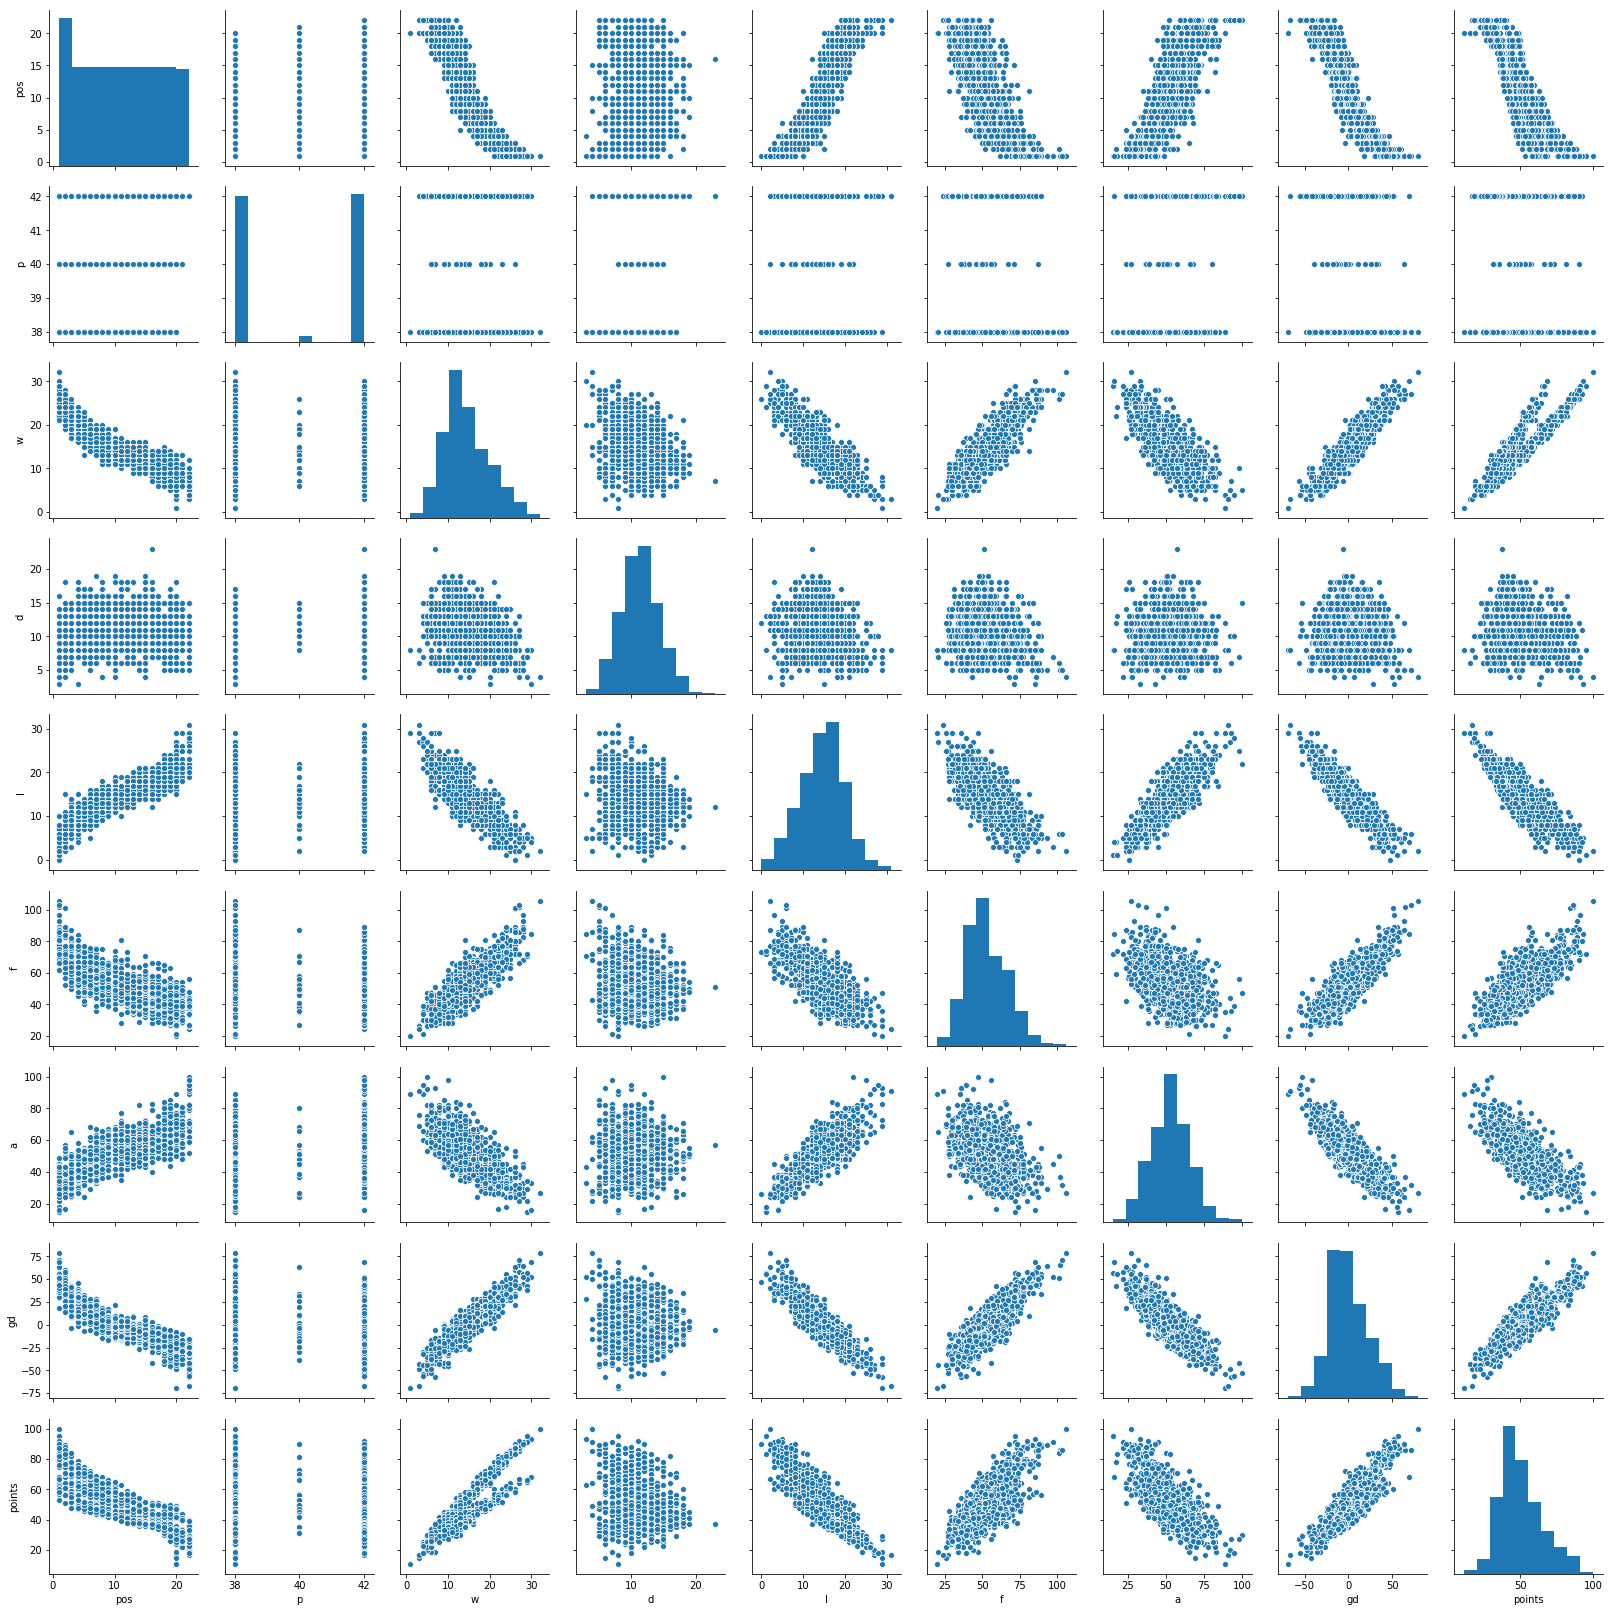

In [202]:
sns.pairplot(data)

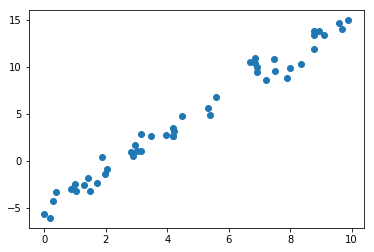

In [203]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

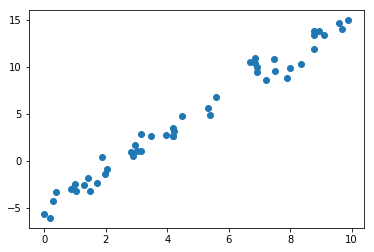

In [204]:
rng = np.random.RandomState(1)
x2 = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x2, y);